In [4]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
import pyautogui


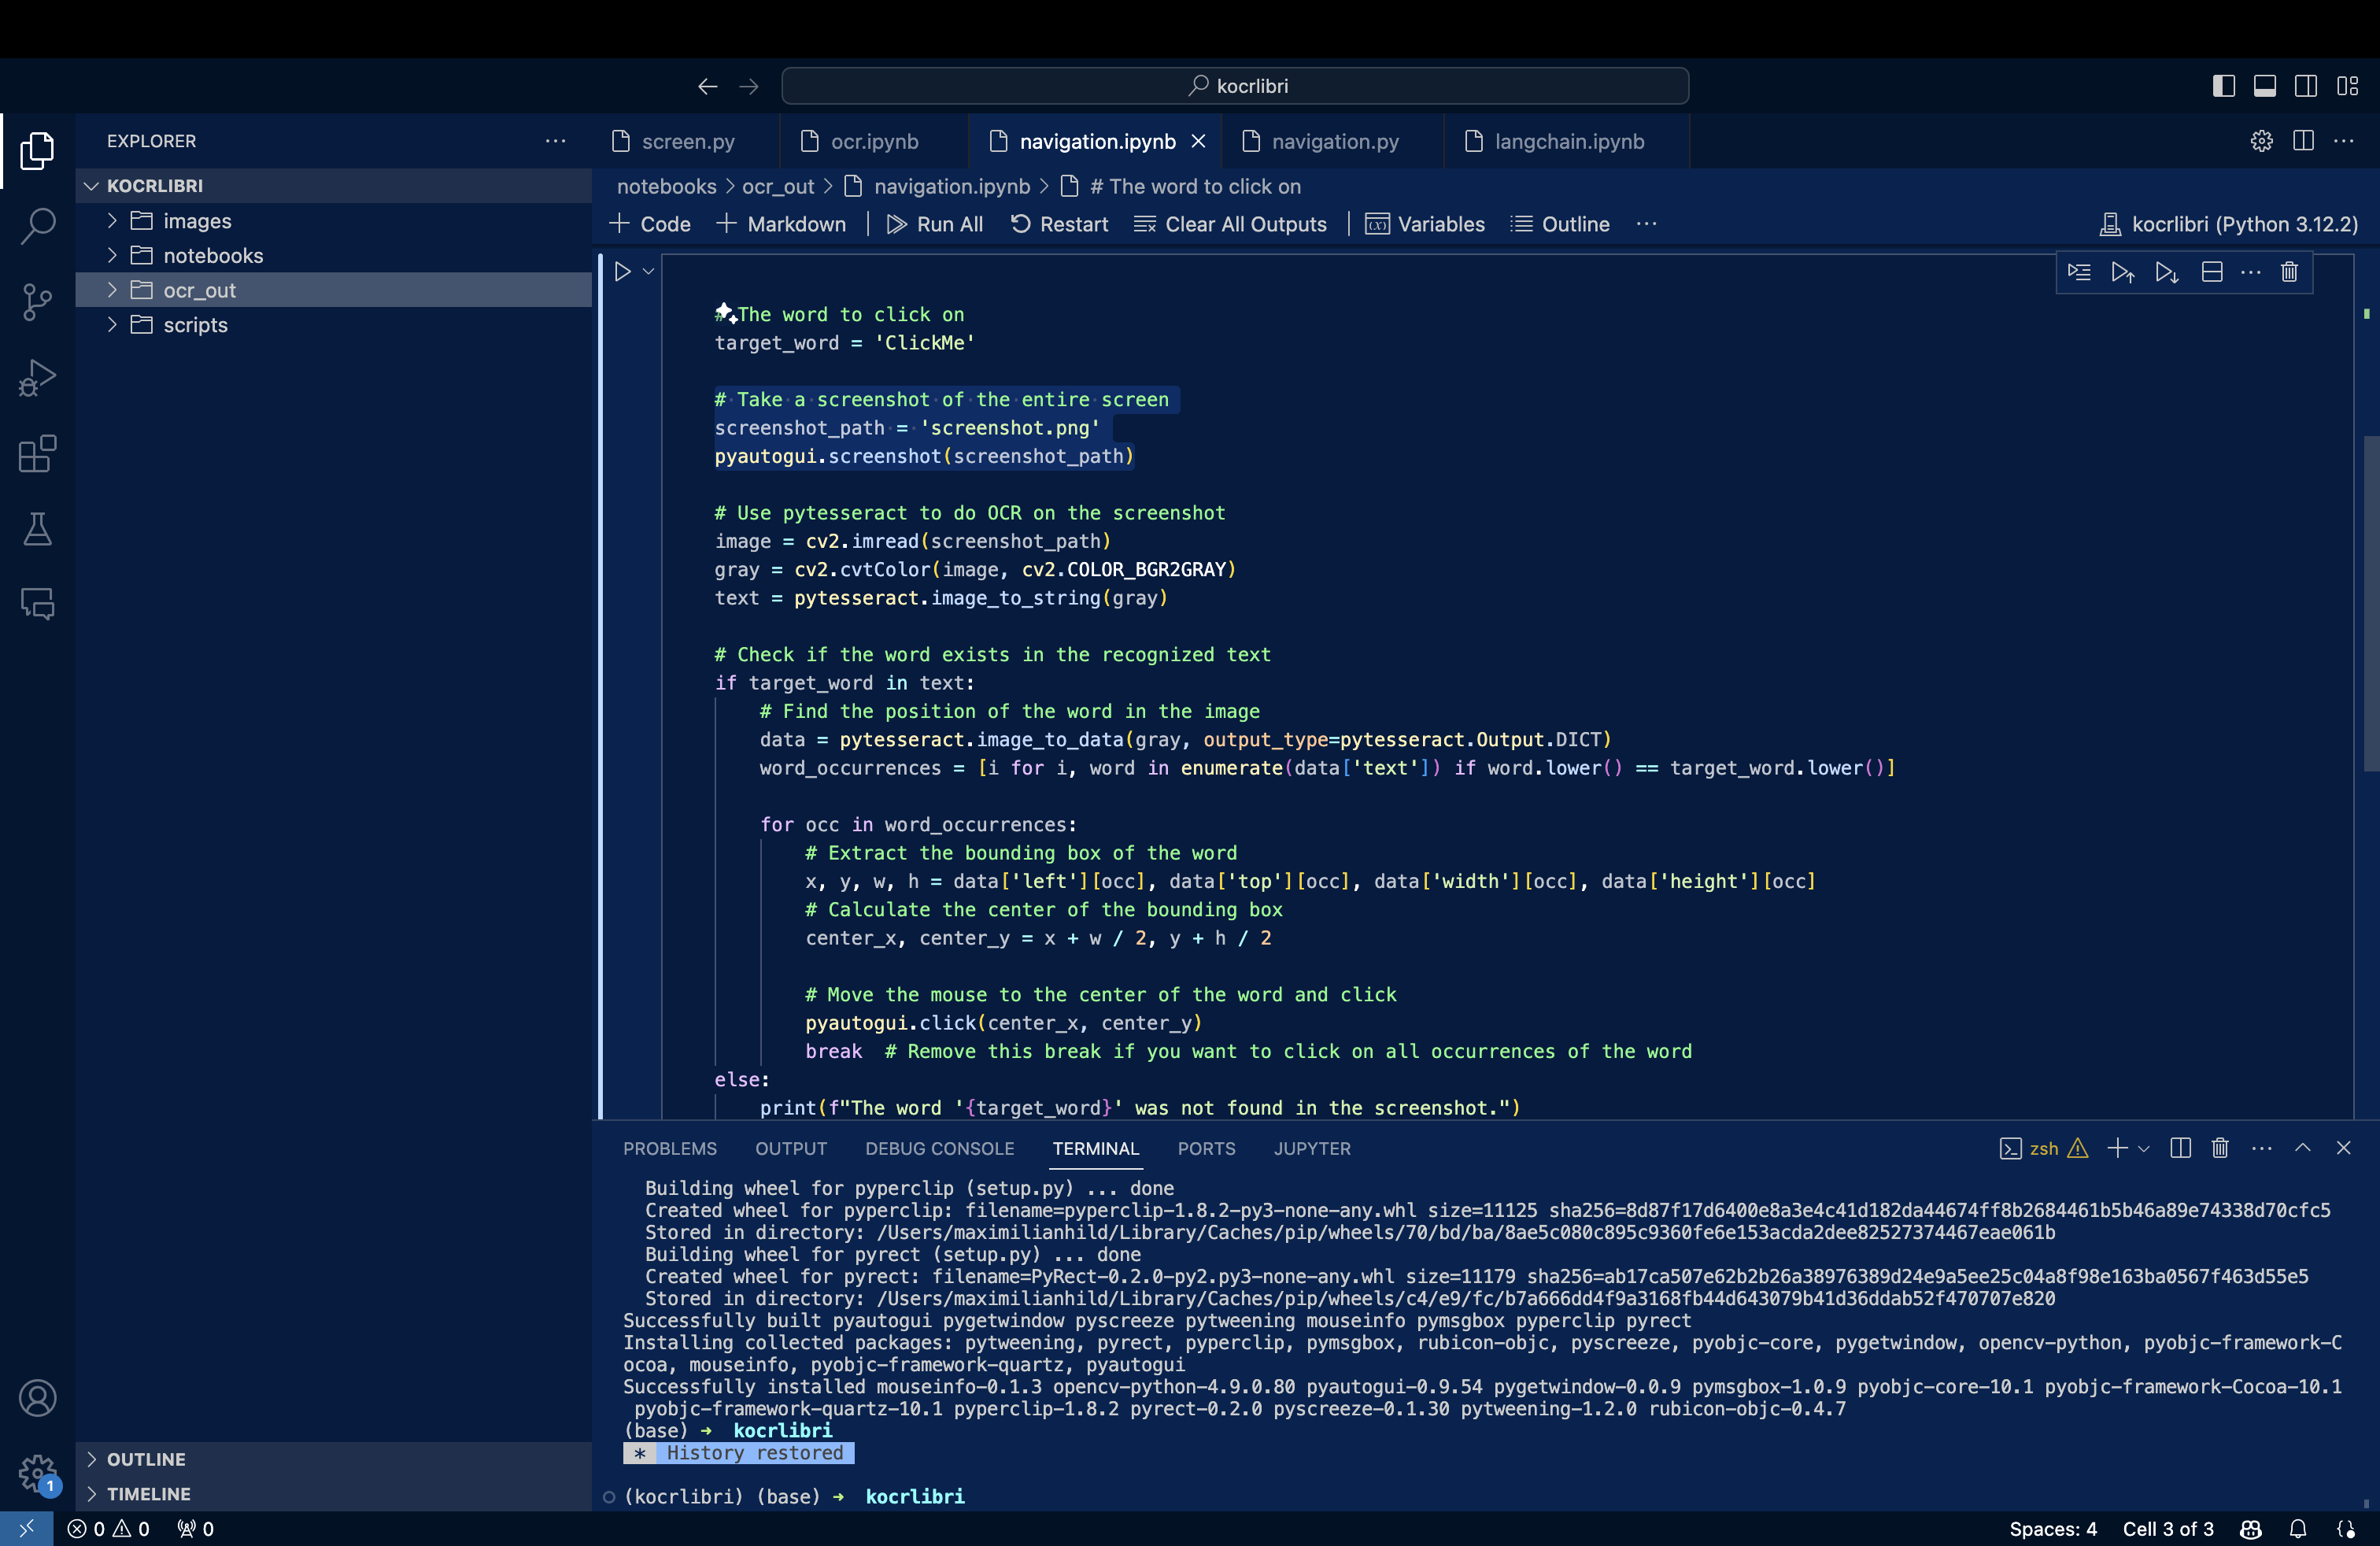

In [5]:
# Take a screenshot of the entire screen
screenshot_path = '/Users/maximilianhild/code/kocrlibri/images/screenshot.png'
pyautogui.screenshot(screenshot_path)

In [ ]:

# The word to click on
target_word = 'ClickMe'

# Take a screenshot of the entire screen
screenshot_path = 'screenshot.png'
pyautogui.screenshot(screenshot_path)

# Use pytesseract to do OCR on the screenshot
image = cv2.imread(screenshot_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(gray)

# Check if the word exists in the recognized text
if target_word in text:
    # Find the position of the word in the image
    data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)
    word_occurrences = [i for i, word in enumerate(data['text']) if word.lower() == target_word.lower()]
    
    for occ in word_occurrences:
        # Extract the bounding box of the word
        x, y, w, h = data['left'][occ], data['top'][occ], data['width'][occ], data['height'][occ]
        
		# Changing ratio to fit retina display
        x /= 2
        y /= 2
        # Calculate the center of the bounding box
        center_x, center_y = x + w / 2, y + h / 2
        
        # Move the mouse to the center of the word and click
        pyautogui.moveTo(center_x, center_y, duration=2)
        pyautogui.click(center_x, center_y)
        break  # Remove this break if you want to click on all occurrences of the word
else:
    print(f"The word '{target_word}' was not found in the screenshot.")
